Having another look at the COS lightcurve with better code

In [29]:
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import calcos
import costools
import lightkurve as lk
from astropy.convolution import convolve, Box1DKernel

#from costools import splittag

%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '/media/david/1tb_storage1/emergency_data/cc_cet/hst/'
dpath = '{}data/'.format(path)

In [4]:
tags = glob.glob('{}*corrtag*.fits'.format(dpath))
tags

['/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc01xkq_corrtag_a.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc01xkq_corrtag_b.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc01xsq_corrtag_a.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc01xsq_corrtag_b.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc01xvq_corrtag_a.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc01xvq_corrtag_b.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc01xxq_corrtag_a.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc01xxq_corrtag_b.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc51p5q_corrtag_a.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc51p5q_corrtag_b.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/data/ldlc51p7q_corrtag_a.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/hst/

In [5]:
tagpath = '{}tagfiles/'.format(path)
tbin =10
for tag in tags:
    rootname = fits.getheader(tag,0)['ROOTNAME']
    costools.splittag.splittag(tag, '{}{}_split{}s'.format(tagpath, rootname, tbin), increment=tbin)

/media/david/1tb_storage1/emergency_data/cc_cet/hst/tagfiles/ldlc01xkq_split10s_1_corrtag_a.fits written


/media/david/1tb_storage1/emergency_data/cc_cet/hst/tagfiles/ldlc01xkq_split10s_2_corrtag_a.fits written
/media/david/1tb_storage1/emergency_data/cc_cet/hst/tagfiles/ldlc01xkq_split10s_3_corrtag_a.fits written
/media/david/1tb_storage1/emergency_data/cc_cet/hst/tagfiles/ldlc01xkq_split10s_4_corrtag_a.fits written
/media/david/1tb_storage1/emergency_data/cc_cet/hst/tagfiles/ldlc01xkq_split10s_5_corrtag_a.fits written
/media/david/1tb_storage1/emergency_data/cc_cet/hst/tagfiles/ldlc01xkq_split10s_6_corrtag_a.fits written
/media/david/1tb_storage1/emergency_data/cc_cet/hst/tagfiles/ldlc01xkq_split10s_7_corrtag_a.fits written
/media/david/1tb_storage1/emergency_data/cc_cet/hst/tagfiles/ldlc01xkq_split10s_8_corrtag_a.fits written
/media/david/1tb_storage1/emergency_data/cc_cet/hst/tagfiles/ldlc01xkq_split10s_9_corrtag_a.fits written
/media/david/1tb_storage1/emergency_data/cc_cet/hst/tagfiles/ldlc01xkq_split10s_10_corrtag_a.fits written
/media/david/1tb_storage1/emergency_data/cc_cet/hst/ta

In [8]:
newtags = glob.glob('{}*{}s*corrtag_a*'.format(tagpath, tbin))
# newtags

In [9]:
os.environ['lref'] = dpath

In [36]:
outpath = '{}/'.format(path)
for tag in newtags[0:1]:
    calcos.calcos(tag, outdir=outpath, verbosity=0)

CALCOS version 3.3.10
numpy version 1.18.5
astropy version 4.1
Shifting to -9, -3
Shifting to -11, -3
Shifting to -10, -3
Shifting to -9, -2
Shifting to -11, -2
Shifting to -10, -2
Shifting to -9, -1
Shifting to -11, -1
Shifting to -10, -1
Shifting to -9, 0
Shifting to -11, 0
Shifting to -10, 0
Shifting to -9, 1
Shifting to -11, 1
Shifting to -10, 1
Shifting to -9, 2
Shifting to -11, 2
Shifting to -10, 2
Shifting to -9, 3
Shifting to -11, 3
Shifting to -10, 3
Shifting to -9, 4
Shifting to -11, 4
Shifting to -10, 4
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 425.191480
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


Shifting to -9, -1
Shifting to -8, -1
Shifting to -10, -1
Shifting to -9, 0
Shifting to -8, 0
Shifting to -10, 0
Shifting to -9, 1
Shifting to -8, 1
Shifting to -10, 1
Shifting to -9, 2
Shifting to -8, 2
Shifting to -10, 2
Shifting to -9, 3
Shifting to -8, 3
Shifting to -10, 3
Extraction algorithm = TWOZONE
Two-zone extraction method
Using profile centroid of 485.694774
Calculating background for reference profile
Using extraction percentiles of:
0.500000 and 99.500000 (outer region)
and 10.000000 and 90.000000 (inner region)


In [25]:
# xtestpath = '{}x1dcorr_test/'.format(path)
# for tag in newtags[0:2]:
#     costools.x1dcorr.x1dcorr(tag, outdir=xtestpath)

In [26]:
# costools.x1dcorr.help()

In [13]:
newx1ds = glob.glob('{}*{}s*x1d.fits'.format(outpath,tbin))
len(newx1ds)

176

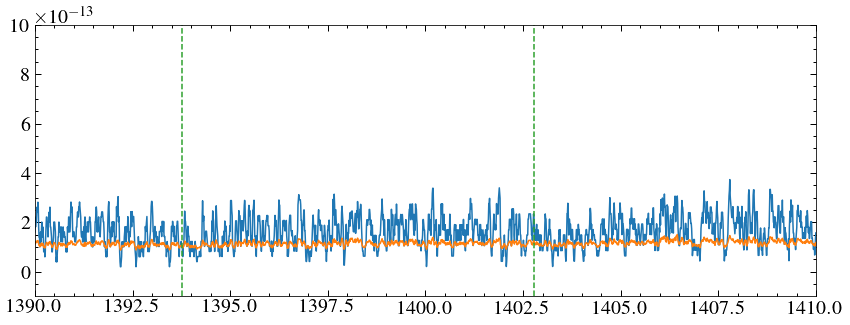

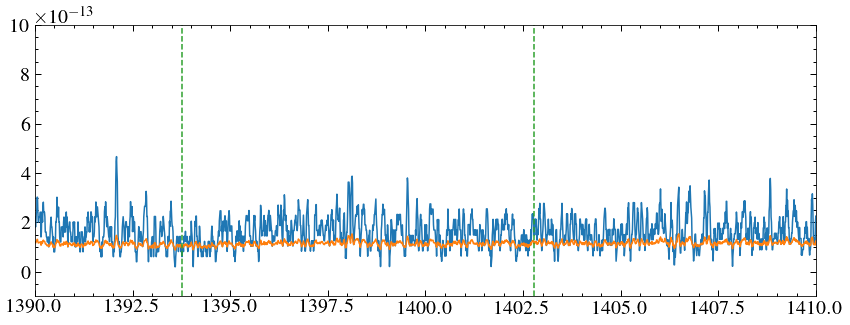

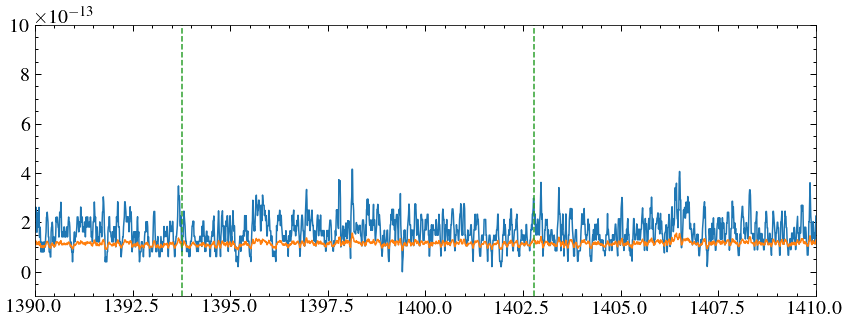

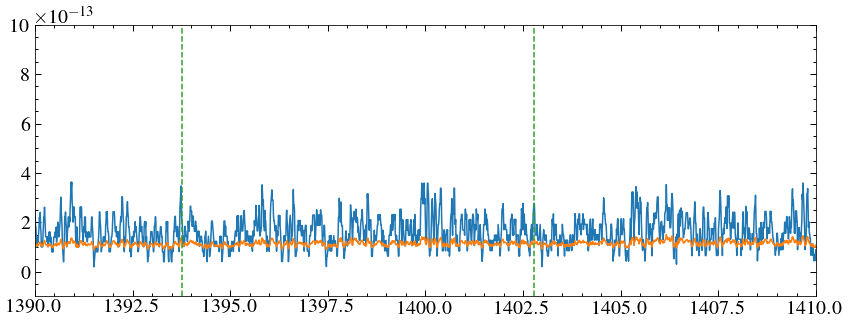

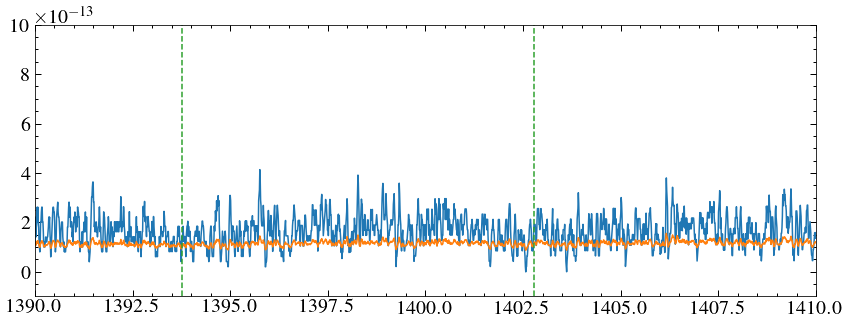

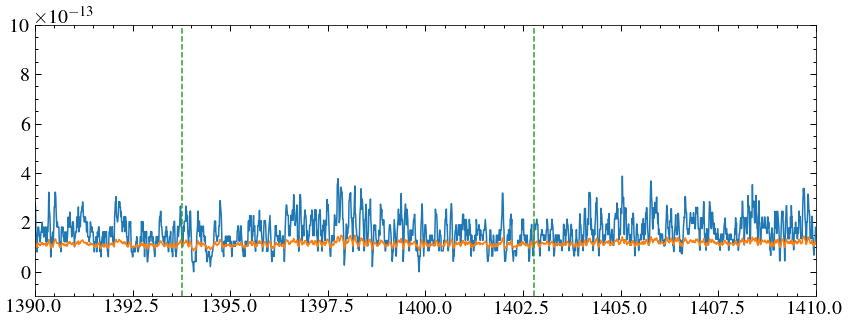

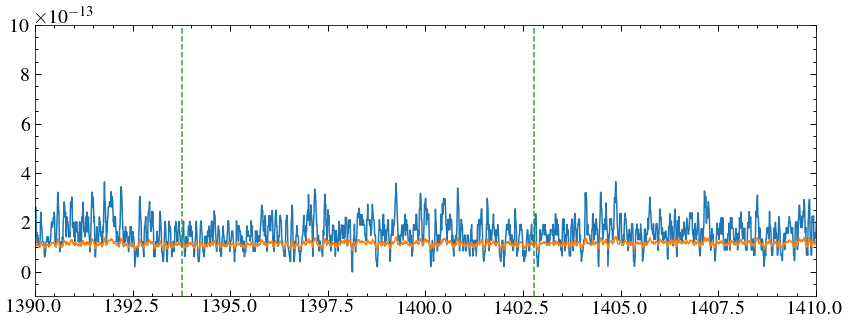

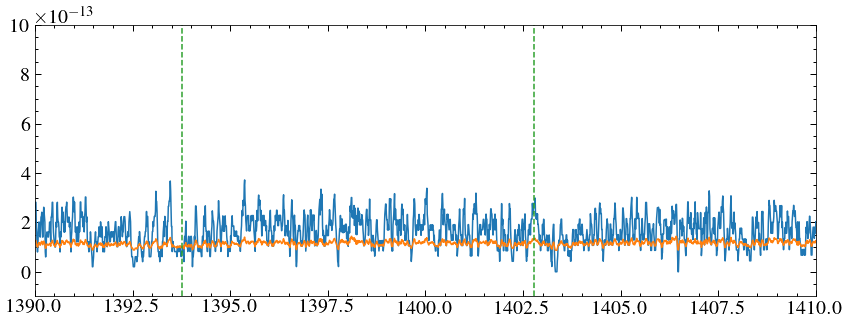

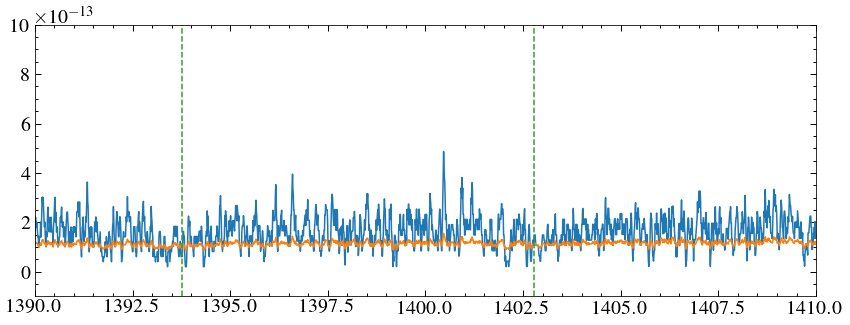

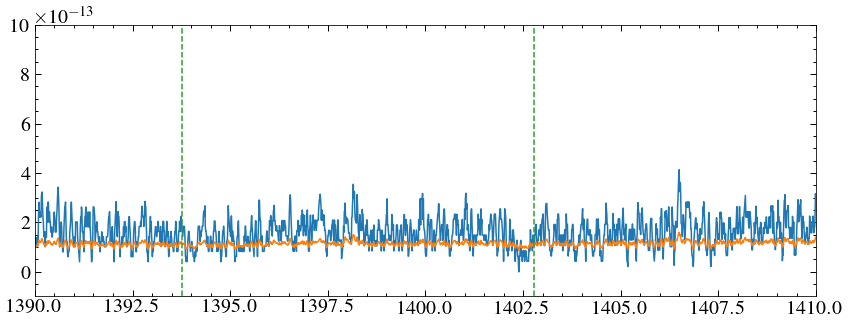

In [34]:
si4 = [1393.775,1402.770]

smooth=5
for x in newx1ds[0:10]:
    data = fits.getdata(x, 1)
    for dt in data:
        w, f, e, dq = dt['WAVELENGTH'], dt['FLUX'], dt['ERROR'], dt['DQ']
        mask = (dq == 0) & (w < 1900)
#         w, f, e = w[mask], f[mask], e[mask]
        f = convolve(f,Box1DKernel(smooth))
        e = convolve(e,Box1DKernel(smooth))/(smooth**0.5)
        plt.plot(w, f)
        plt.plot(w, e)
    plt.xlim(1390,1410)
    plt.ylim(-1e-13, 1e-12)
    [plt.axvline(line, ls='--', c='C2') for line in si4]
    plt.show()

In [14]:
# fits.getheader(x,1)

In [15]:
# for i, x in enumerate(newx1ds):
#     hdr= fits.getheader(x, 1)
#     print() 
#     print(hdr['EXPSTRTJ'], hdr['EXPENDJ'], hdr['EXPTIME'])
#     plt.scatter(i, hdr['EXPENDJ'])

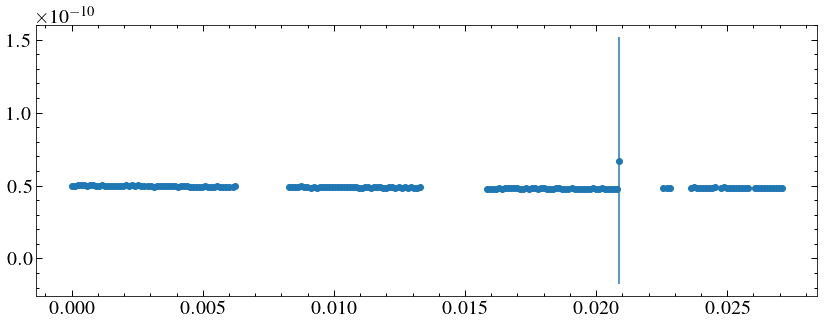

In [23]:
def wavelength_edges(w):
    """
    Calulates w0 and w1
    """
    diff = np.diff(w)
    diff = np.insert(diff, 0, diff[0]) #adds an extravalue to make len(diff) = len(w)
    w0 = w - diff/2.
    w1 = w + diff/2.
    return w0, w1


band = [1250, 1700] #pick the wavelength range to integrate.
time = [] #arrays to put the light curve in
flux = []
error = []
counts = []
for x in newx1ds:
    hdul = fits.open(x)
    hdr = hdul[1].header
    data = hdul[1].data
    hdul.close()
    ti = hdr['EXPENDJ'] - ((hdr['EXPTIME']*u.s).to(u.d).value)/2
    time.append(ti)
    fis = []
    eis = []
    cis = []
    for dt in data:
        w, f, e, c, dq = dt['WAVELENGTH'], dt['FLUX'], dt['ERROR'], dt['NET'],dt['DQ']
        w0, w1 = wavelength_edges(w) 
        mask = (dq == 0) & (w > 1210) | (w < 1220) & (dq==0)
        w0, w1, f, e, c = w0[mask], w1[mask], f[mask], e[mask],c[mask]
        fi = np.sum(f*(w1-w0))
        ci = np.sum(c*(w1-w0))
        ei = (np.sum(e**2 * (w1-w0)**2))**0.5
        fis.append(fi)
        eis.append(ei)
        cis.append(ci)
    flux.append(np.sum(np.array(fis)))
    counts.append(np.sum(np.array(cis)))
    error.append(np.sum(np.array(eis)**2)**0.5)
    
time, flux, error, counts = np.array(time), np.array(flux), np.array(error), np.array(counts)
t0 = min(time)
plt.errorbar(time-t0, flux, yerr = error, marker='o', ls='none') #plot the light curve
# plt.ylabel('Counts (s$^{-1})$')
# plt.xlabel('Time (MJD-{})'.format(t0))
plt.show()    

<ErrorbarContainer object of 3 artists>

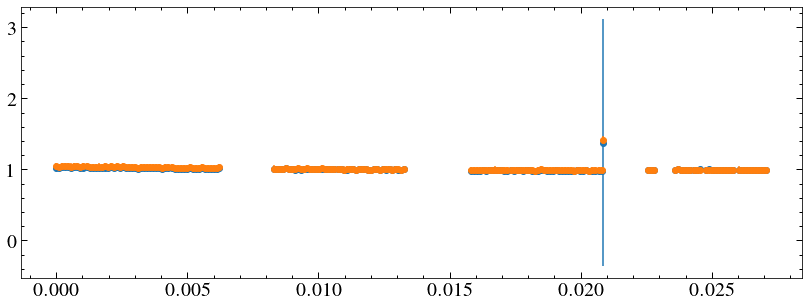

In [24]:
nf = flux/np.median(flux)
ne = error/np.median(flux)
nc = counts/np.median(counts)
nce = (np.sqrt(counts*tbin)/(tbin))/np.median(counts)
# plt.scatter(time, nf)
plt.errorbar(time-t0, nf, yerr = ne, marker='o', ls='none') #plot the light curve
plt.errorbar(time-t0, nc, yerr = nce, marker='o', ls='none') #plot the light curve
# plt.errorbar(time, nf, yerr = ne, ls='none', c='C1') #plot the light curve
# plt.ylim(0, 1.3)
# plt.xlim(0.045, 0.07)

In [37]:
lc = lk.LightCurve(time=time, flux=flux, flux_err=error)

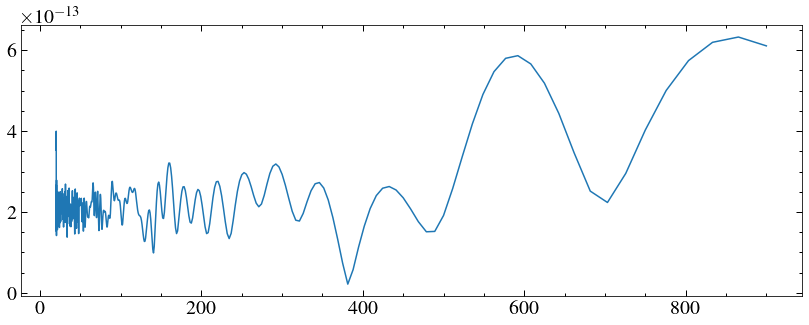

In [38]:
pg=lc.to_periodogram(oversample_factor=10, minimum_period=20*u.s, maximum_period=900*u.s)
plt.plot(pg.period.to(u.s), pg.power)